In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

In [3]:
node_data = pd.read_csv("nodes (5).csv")
edge_data = pd.read_csv("edges (5).csv")

In [4]:
# def get_node_data_from_merged(merged_data, node_index):

#     filtered = merged_data[merged_data["node"] == node_index]
#     filtered.drop(["node"], axis=1, inplace=True)
    
#     unflattened = unflatten_dataframe(filtered)
    
#     return unflattened

# def unflatten_dataframe(df_flat):
#     df = df_flat.pivot(index='timestamp', columns='feature', values='value')
#     df.reset_index(drop=True, inplace=True)
#     df.columns.name = None
#     return df

merged_data = node_data
num_nodes = len(node_data["node"].unique())

a = merged_data[merged_data["node"] == 0]
a.drop(["node"], axis=1, inplace=True)

a = a.pivot(index='timestamp', columns='feature', values='value')
a

C:\Users\NIRMAL\AppData\Local\Temp\ipykernel_23776\2187351972.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(["node"], axis=1, inplace=True)


feature,0,1,2
timestamp,,,
0,0.146327,0.663487,0.705645
1,0.099489,0.364900,0.741748
2,0.236545,0.415529,0.502843
3,0.094985,0.648582,0.417143
4,0.293369,0.496667,0.609116
...,...,...,...
995,0.272662,0.762868,0.234369
996,0.341888,0.933531,0.045206
997,0.534966,0.884431,0.436349


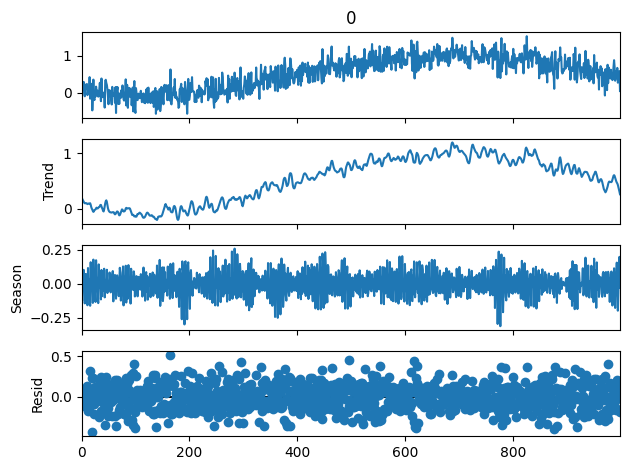

In [5]:
f1 = a.iloc[:,0]
stl = STL(f1,period=5)
res = stl.fit()
fig = res.plot()



c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


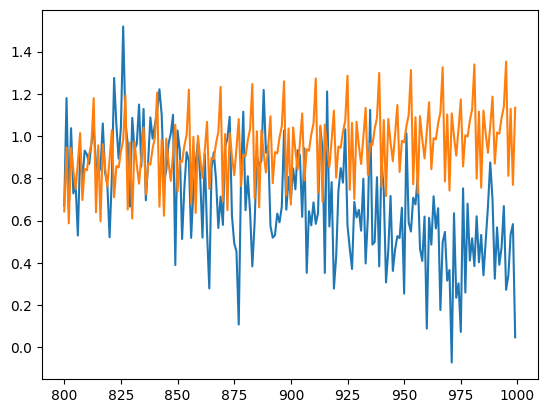

In [6]:
stlf = STLForecast(f1[:800], ARIMA, model_kwargs=dict(order=(3, 1, 3), trend="t"),period=14)
stlf_res = stlf.fit()

forecast = stlf_res.forecast(200)

plt.plot(f1[800:1000])

plt.plot(forecast)
plt.show()

c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


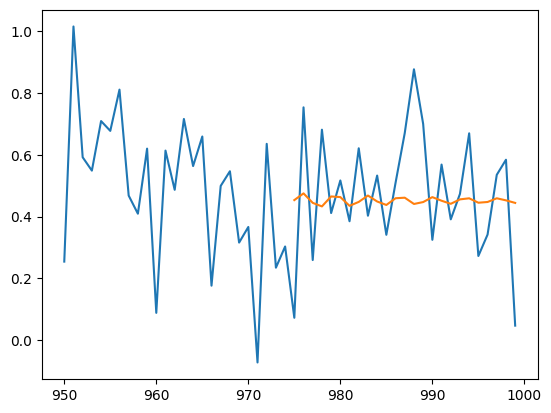

In [7]:
model = sm.tsa.arima.ARIMA(f1[:975], order=(3, 1, 3))
model_fit = model.fit()

forecast = model_fit.forecast(25)

plt.plot(f1[950:1000])

plt.plot(forecast)
plt.show()

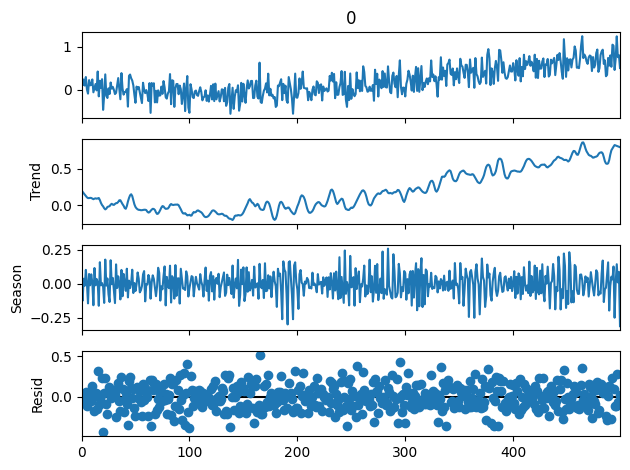

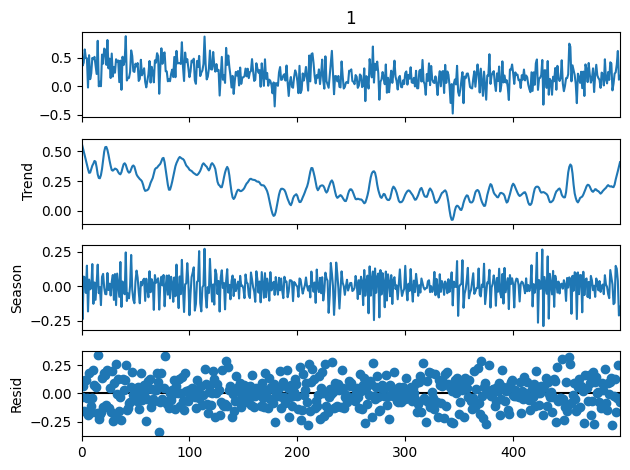

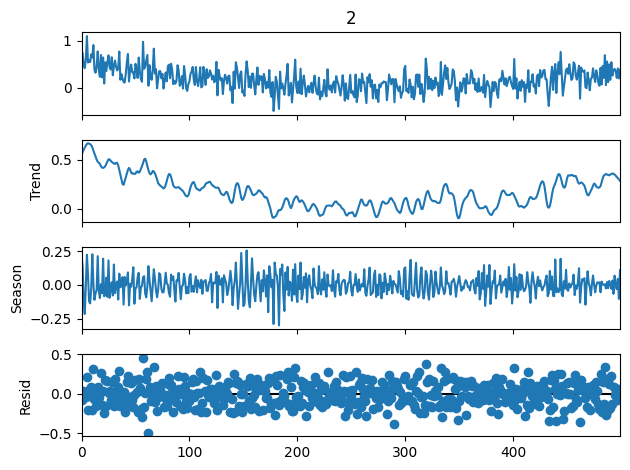

In [8]:
for i in range(len(a.columns)):
    f = a.iloc[:500,i]
    stl = STL(f,period=5)
    res = stl.fit()
    fig = res.plot()